# Multiple Linear Regression Using wine Quality Dataset  (Link to the dataset: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)




Regression Analysis
## Assignment Overview
In this part we will build a Multiple Linear Regression [From Scratch] on your selected dataset.




## Learning Outcomes
Learning outcomes can be following but not limited to:
1. Use Pandas as the primary tool to process structured data in Python with CSV files, 2. Use matplotlib and seaborn library to produce various plots for visualization,
3. Train a machine learning model and use it to make a prediction from scratch.


##About Dataset :

 The Wine Quality dataset contains information on various chemical properties of wine samples and their corresponding quality scores. The features of the dataset are various chemical properties of the wine samples, and the target variable is the pH score.The dataset has 1143 rows and 11 columns.

## Tasks


## 1. Drive Mounting

In [ ]:
#By using the Google Drive file ID, we can import a single file.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Necessary Inputs

In [ ]:
#Necessary Inputs
#Importing numpy for using arrays and performing operations on lists.
import numpy as np
#Importing statsmodels.api library for performing linear regression.
import statsmodels.api as sm
#Importing matplotlib.pyplot for visualizing data.
import matplotlib.pyplot as plt
#Importing Seaborn a Python data visualization library built on top of Matplotlib
import seaborn as sns
#Importing pandas for data analysis and manipulation.
import pandas as pd

# Setting theme of all the plots
sns.set_theme(style="darkgrid")
# To show all columns
pd.set_option('max_columns', None)
# To show all rows
pd.set_option('display.max_rows',None)

# Part-I:  Multiple Linear Regression

## 1. Data Understanding, Cleaning and Transformation [2]
Understand what is data about and why do you think the data was collected, and what research questions data can answers.

(a) You can explain your logic in the text cell of your notebook.

(b) Based on your research questions Identify Dependent and Independent Variables.

(c) Use pandas to load your dataset and observe the data.
If required perform basic data cleaning and Transformation the way you fits your task requirements.


## 1.1 Data Understanding

In [ ]:
#Creating a variable named nimisha and providing path to the .csv file.
nimisha = "/content/drive/MyDrive/AI/Wine.csv"

In [ ]:
#Reads the data inside data using pandas
nimisha = pd.read_csv(nimisha)
#Displays the file read for nimisha
nimisha

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               6.7             0.580         0.08            1.80      0.097   
10              5.6             0.615         0.00            1.60      0.089   
11              7.8             0.610         0.29            1.60      0.114   
12              8.5             0.280         0.56            1.80      0.092   
13              7.9             0.320         0.51            1.80      0.341   
14              7.6             0.390         0.31            2.30      0.082   
15              7.9             0.430         0.21            1.60      0.106   
16              8.5             0.490         0.11            2.30      0.084   
17              6.9             0.400         0.14            2.40      0.085   
18              6.3             0.390         0.16            1.40      0.080   
19              7.6             0.410         0.24            1.80      0.080   
20              7.1             0.710         0.00            1.90      0.080   
21              7.8             0.645         0.00            2.00      0.082   
22              6.7             0.675         0.07            2.40      0.089   
23              8.3             0.655         0.12            2.30      0.083   
24              5.2             0.320         0.25            1.80      0.103   
25              7.8             0.645         0.00            5.50      0.086   
26              7.8             0.600         0.14            2.40      0.086   
27              8.1             0.380         0.28            2.10      0.066   
28              7.3             0.450         0.36            5.90      0.074   
29              8.8             0.610         0.30            2.80      0.088   
30              7.5             0.490         0.20            2.60      0.332   
31              8.1             0.660         0.22            2.20      0.069   
32              4.6             0.520         0.15            2.10      0.054   
33              7.7             0.935         0.43            2.20      0.114   
34              8.8             0.660         0.26            1.70      0.074   
35              6.6             0.520         0.04            2.20      0.069   
36              6.6             0.500         0.04            2.10      0.068   
37              8.6             0.380         0.36            3.00      0.081   
38              7.6             0.510         0.15            2.80      0.110   
39             10.2             0.420         0.57            3.40      0.070   
40              7.8             0.590         0.18            2.30      0.076   
41              7.3             0.390         0.31            2.40      0.074   
42              8.8             0.400         0.40            2.20      0.079   
43              7.7             0.690         0.49            1.80      0.115   
44              7.0             0.735         0.05            2.00      0.081   
45              7.2             0.725         0.05            4.65      0.086   
46              7.2             0.725         0.05            4.65      0.086   
47              6.6             0.705         0.07            1.60      0.076   
48              8.0             0.705

In [ ]:
#Verifying datatype and null count of all features
nimisha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   sulphates             1143 non-null   float64
 9   alcohol               1143 non-null   float64
 10  pH                    1143 non-null   float64
dtypes: float64(11)
memory usage: 98.4 KB


In [ ]:
#Verifying the datatypes of the all the columns
nimisha.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
pH                      float64
dtype: object

In [ ]:
#Using for loop in columna of nimisha dataset

for col in nimisha:

   #If condition for "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "cholorides", "free sulphur dioxide", "density", "sulphates", "alcohol", "pH" columns

  if col in ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "sulphates", "alcohol", "pH"]:

     #Printing the column mentioned in the above array
    print ("Column Name: ", col)

     #Printing the sum of data inside each column of the array.

    print ('Sum = ', nimisha[col].sum())

    #Printing the mean of data inside each column of the array.

    print('Mean = {:.2f}'.format(nimisha[col].mean()))

    #Printing the median of data inside each column of the array.

    print('Median = ', nimisha[col].median())

    #Printing the standard deviation  of data inside each column of the array.

    print('Standard Deviation = {:.2f}'.format(nimisha[col].std()))

    #Printing the maximum of data inside each column of the array.

    print('Maximum = ', nimisha[col].max())

    #Printing the minimum of data inside each column of the array.

    print('Minimum = ',nimisha[col].min())
    print('\n')

Column Name:  fixed acidity
Sum =  9499.6
Mean = 8.31
Median =  7.9
Standard Deviation = 1.75
Maximum =  15.9
Minimum =  4.6


Column Name:  volatile acidity
Sum =  607.3199999999999
Mean = 0.53
Median =  0.52
Standard Deviation = 0.18
Maximum =  1.58
Minimum =  0.12


Column Name:  citric acid
Sum =  306.74
Mean = 0.27
Median =  0.25
Standard Deviation = 0.20
Maximum =  1.0
Minimum =  0.0


Column Name:  residual sugar
Sum =  2894.25
Mean = 2.53
Median =  2.2
Standard Deviation = 1.36
Maximum =  15.5
Minimum =  0.9


Column Name:  chlorides
Sum =  99.364
Mean = 0.09
Median =  0.079
Standard Deviation = 0.05
Maximum =  0.611
Minimum =  0.012


Column Name:  free sulfur dioxide
Sum =  17848.5
Mean = 15.62
Median =  13.0
Standard Deviation = 10.25
Maximum =  68.0
Minimum =  1.0


Column Name:  total sulfur dioxide
Sum =  52480.5
Mean = 45.91
Median =  37.0
Standard Deviation = 32.78
Maximum =  289.0
Minimum =  6.0


Column Name:  density
Sum =  1139.2628599999998
Mean = 1.00
Median =  0.

In [ ]:
# Checking statistical measure of all continuous data
nimisha.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

         sulphates      alcohol           pH  
count  1143.000000  1143.000000  1143.000000  
mean      0.657708    10.442111     3.311015  
std       0.170399     1.082196     0.156664  
min       0.330000     8.400000     2.740000  
25%       0.550000     9.500000     3.205000  
50%       0.620000    10.200000     3.310000  
75%       0.730000    11.100000     3.400000  
max       2.000000    14.900000     4.010000

## 1.2. Data Cleaning


In [ ]:
# Checking number of empty values in each column
nimisha.isna().sum().sort_values()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
pH                      0
dtype: int64

It checks for missing or "not a number" (NaN) values in nimisha dataframe.

isna() looks at each value in the nimisha DataFrame and determines if it is missing or NaN. If it is, the value is recorded as True, and if not, it is recorded as False.

sum() takes the resulting DataFrame from step 1 and adds up the number of True values for each column. This gives us the total number of missing or NaN values for each column.

sort_values() sorts the total number of missing or NaN values in each column in ascending order.

The resulting series contains only zeros, it means that there are no missing values in any of the columns of the original DataFrame.

It will remove all the rows from the nimisha DataFrame that contain missing or NaN values and modify the nimisha DataFrame directly. Since the nimisha dataframe doesn't contain any missing or not a number(NAN) value the dataset remains unchanged.

In [ ]:
#Checking duplicated data
nimisha.duplicated()

0       False
1       False
2       False
3       False
4        True
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46       True
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64       True
65       True
66      False
67      False
68      False
69      False
70      False
71    

In [ ]:
# Verifies the duplicate rows
print("Number of duplicated rows:", nimisha.duplicated().sum())

Number of duplicated rows: 125


In [ ]:
# Removes the duplicate rows
nimisha = nimisha.drop_duplicates()

# Verify that the duplicates have been removed
print("Number of duplicated rows after removal:", nimisha.duplicated().sum())



Number of duplicated rows after removal: 0


It verifies that the duplicated rows have been removed by checking that there are no duplicates remaining in the dataset.

## 1.3. Identify Dependent and Independent Variables

The dependent variable in a machine learning problem is the target that we are attempting to predict, and the independent variables are the features or inputs used to make the prediction. The dependent variable in the wine quality dataset is pH value of wine (represented by the pH column), and the independent variables are the other columns in the dataset (e.g., fixed acidity, volatile acidity, etc.).

In [ ]:
# To calculates the pairwise correlation of all the columns in the nimisha data frame.
nimisha.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.236894     0.668178   
volatile acidity          -0.236894          1.000000    -0.542459   
citric acid                0.668178         -0.542459     1.000000   
residual sugar             0.173726         -0.008701     0.178362   
chlorides                  0.102446          0.051371     0.246843   
free sulfur dioxide       -0.152582         -0.007556    -0.048523   
total sulfur dioxide      -0.100716          0.071870     0.047903   
density                    0.683120          0.028614     0.368832   
sulphates                  0.181277         -0.280601     0.347933   
alcohol                   -0.077624         -0.207419     0.102134   
pH                        -0.692597          0.226348    -0.553370   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.173726   0.102446            -0.152582   
volatile acidity           -0.008701   0.051371            -0.007556   
citric acid                 0.178362   0.246843            -0.048523   
residual sugar              1.000000   0.058410             0.146929   
chlorides                   0.058410   1.000000             0.014612   
free sulfur dioxide         0.146929   0.014612             1.000000   
total sulfur dioxide        0.188528   0.044947             0.661089   
density                     0.363112   0.210932            -0.049664   
sulphates                   0.006738   0.392989             0.031844   
alcohol                     0.070779  -0.234283            -0.060876   
pH                         -0.120993  -0.277536             0.051018   

                      total sulfur dioxide   density  sulphates   alcohol  \
fixed acidity                    -0.100716  0.683120   0.181277 -0.077624   
volatile acidity                  0.071870  0.028614  -0.280601 -0.207419   
citric acid                       0.047903  0.368832   0.347933  0.102134   
residual sugar                    0.188528  0.363112   0.006738  0.070779   
chlorides                         0.044947  0.210932   0.392989 -0.234283   
free sulfur dioxide               0.661089 -0.049664   0.031844 -0.060876   
total sulfur dioxide              1.000000  0.053496   0.004963 -0.197917   
density                           0.053496  1.000000   0.138789 -0.504748   
sulphates                         0.004963  0.138789   1.000000  0.096239   
alcohol                          -0.197917 -0.504748   0.096239  1.000000   
pH                               -0.071037 -0.366173  -0.192979  0.230655   

                            pH  
fixed acidity        -0.692597  
volatile acidity      0.226348  
citric acid          -0.553370  
residual sugar       -0.120993  
chlorides            -0.277536  
free sulfur dioxide   0.051018  
total sulfur dioxide -0.071037  
density              -0.366173  
sulphates            -0.192979  
alcohol               0.230655  
pH                    1.000000

In this code, the initial step is to designate the independent variable, "fixed acidity," as the feature variable and assign it to X. Then, the dependent variable, "ph," is assigned to y.

In [ ]:
#Assigning the Dependent variable
y = nimisha['pH']
y

0       3.51
1       3.20
2       3.26
3       3.16
5       3.51
6       3.30
7       3.39
8       3.36
9       3.28
10      3.58
11      3.26
12      3.30
13      3.04
14      3.52
15      3.17
16      3.17
17      3.43
18      3.34
19      3.28
20      3.47
21      3.38
22      3.35
23      3.17
24      3.38
25      3.40
26      3.42
27      3.23
28      3.33
29      3.26
30      3.21
31      3.30
32      3.90
33      3.25
34      3.15
35      3.40
36      3.39
37      3.20
38      3.17
39      3.04
40      3.43
41      3.41
42      3.44
43      3.21
44      3.39
45      3.41
47      3.44
48      3.34
49      3.31
50      3.31
51      3.54
52      3.52
53      3.38
54      3.16
55      3.41
56      3.36
57      3.44
58      3.41
59      2.93
60      3.39
61      3.14
62      3.48
63      3.23
66      3.75
67      3.45
68      3.39
69      3.30
70      3.40
72      3.29
73      3.33
75      3.08
76      3.46
77      3.19
78      3.15
79      3.32
81      3.07
82      3.39
83      3.30

In [ ]:
#Veryfing the Independent variables
print(nimisha.drop(columns=['pH']).head(3))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  
0                 11.0                  34.0   0.9978       0.56      9.4  
1                 25.0                  67.0   0.9968       0.68      9.8  
2                 15.0                  54.0   0.9970       0.65      9.8  


The independent variables are the remaining columns.

In [ ]:
#Storing all the independent varaibles in X
X = nimisha.drop(columns=['pH'])

Extracting the independent variables in X by dropping the dependent varaible column(pH).

## 2. Data Analysis and Visualization [2.5]
Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make various plots to generate insights from dataset. To generate better insights from the data make visualization and plot of your Independent variable against Dependent variable.


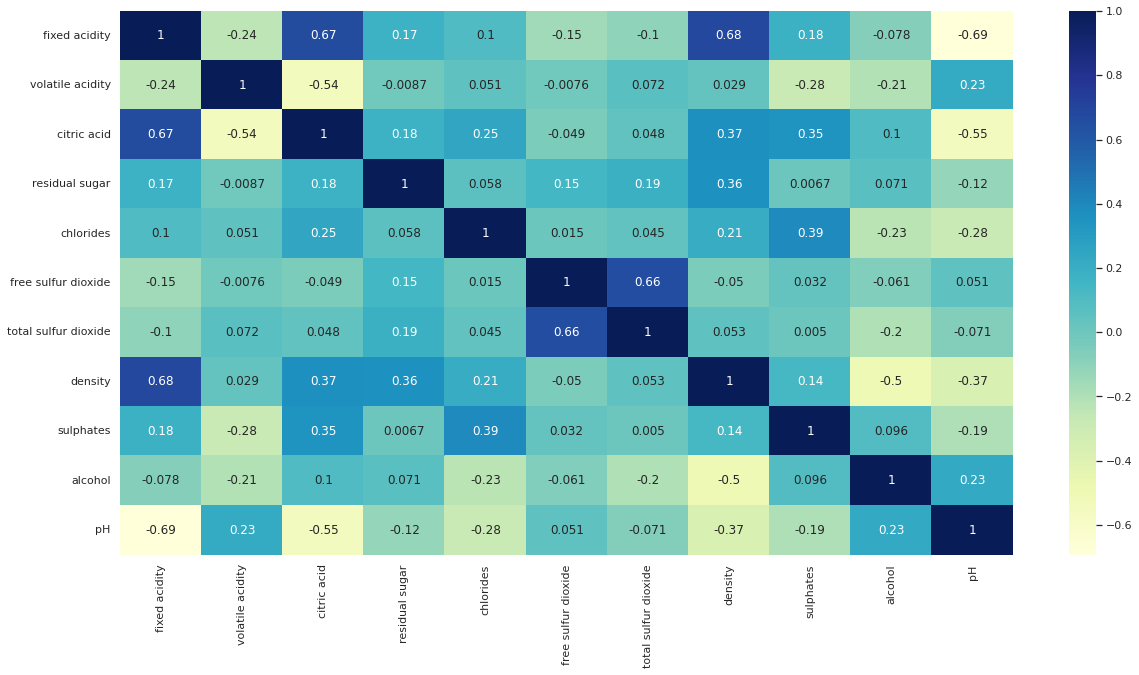

In [ ]:
# Heatmap to display correlation among the data
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(nimisha[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "sulphates", "alcohol", "pH"]].corr(), annot=True , cmap='YlGnBu')
plt.show()

The heatmap displays the correlations between each pair of variables as color-coded cells, where darker colors indicate stronger correlations. This is a useful way to visualize the relationships between the variables and to identify any highly correlated pairs of variables.

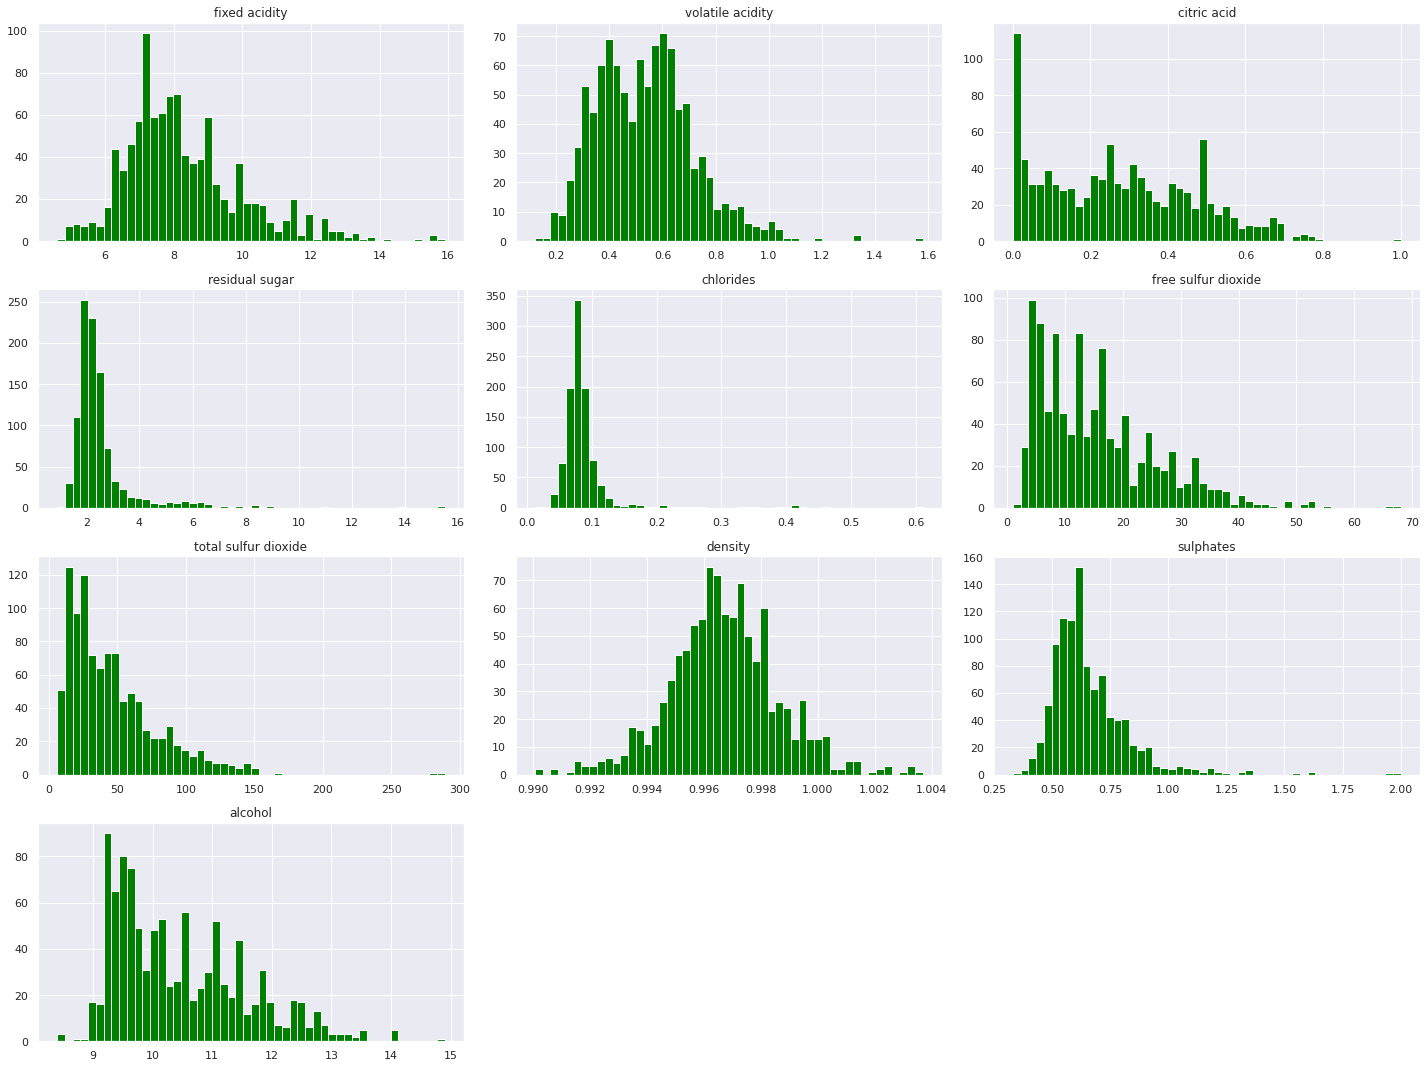

In [ ]:
# Plotting a histogram of each independent variable in X

#The bins parameter determines the number of bins in the histogram.
#the figsize parameter sets the size of the plot.

X.hist(bins=50, figsize=(20,15), color='green')

#The tight_layout method ensures that the plot is properly sized and spaced.
plt.tight_layout()

#The show method displays the plot.
plt.show()

This code generates a histogram of each independent variable in X. A histogram is a representation of the distribution of a set of continuous or discrete data. By plotting a histogram, you can get an idea of the distribution of the independent variables in this data set.

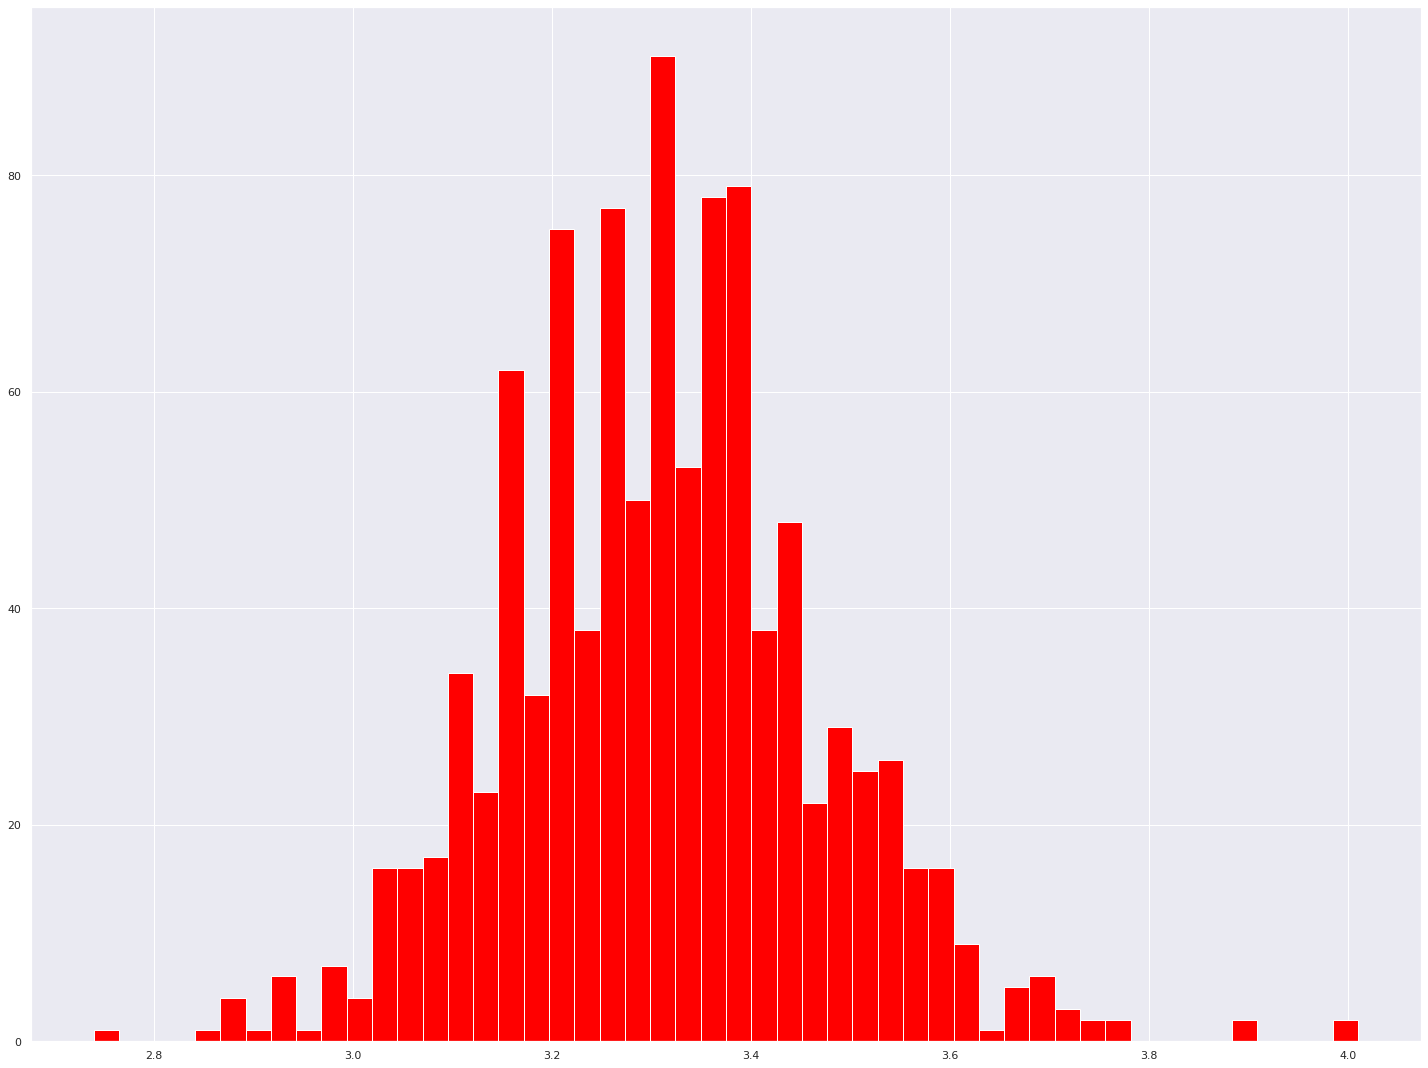

In [ ]:
# Plot a histogram of the dependent variable y

#The bins parameter determines the number of bins in the histogram.
#the figsize parameter sets the size of the plot.
y.hist(bins=50, figsize=(20,15), color='red')

#The tight_layout method ensures that the plot is properly sized and spaced.
plt.tight_layout()

#The show method displays the plot.
plt.show()

This code generates a histogram of each dependent variable in X. A histogram is a representation of the distribution of a set of continuous or discrete data. By plotting a histogram, you can get an idea of the distribution of the dependent variables in our data set. The largest value in this histogram is 85 and the smallest value is 5.

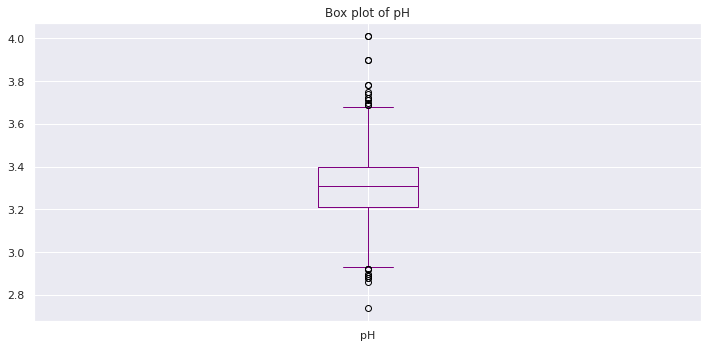

In [ ]:
# Plotting a box plot of the dependent variable y
y.plot(kind='box', figsize=(10,5), showfliers=True, title='Box plot of pH', color= 'purple')
plt.tight_layout()


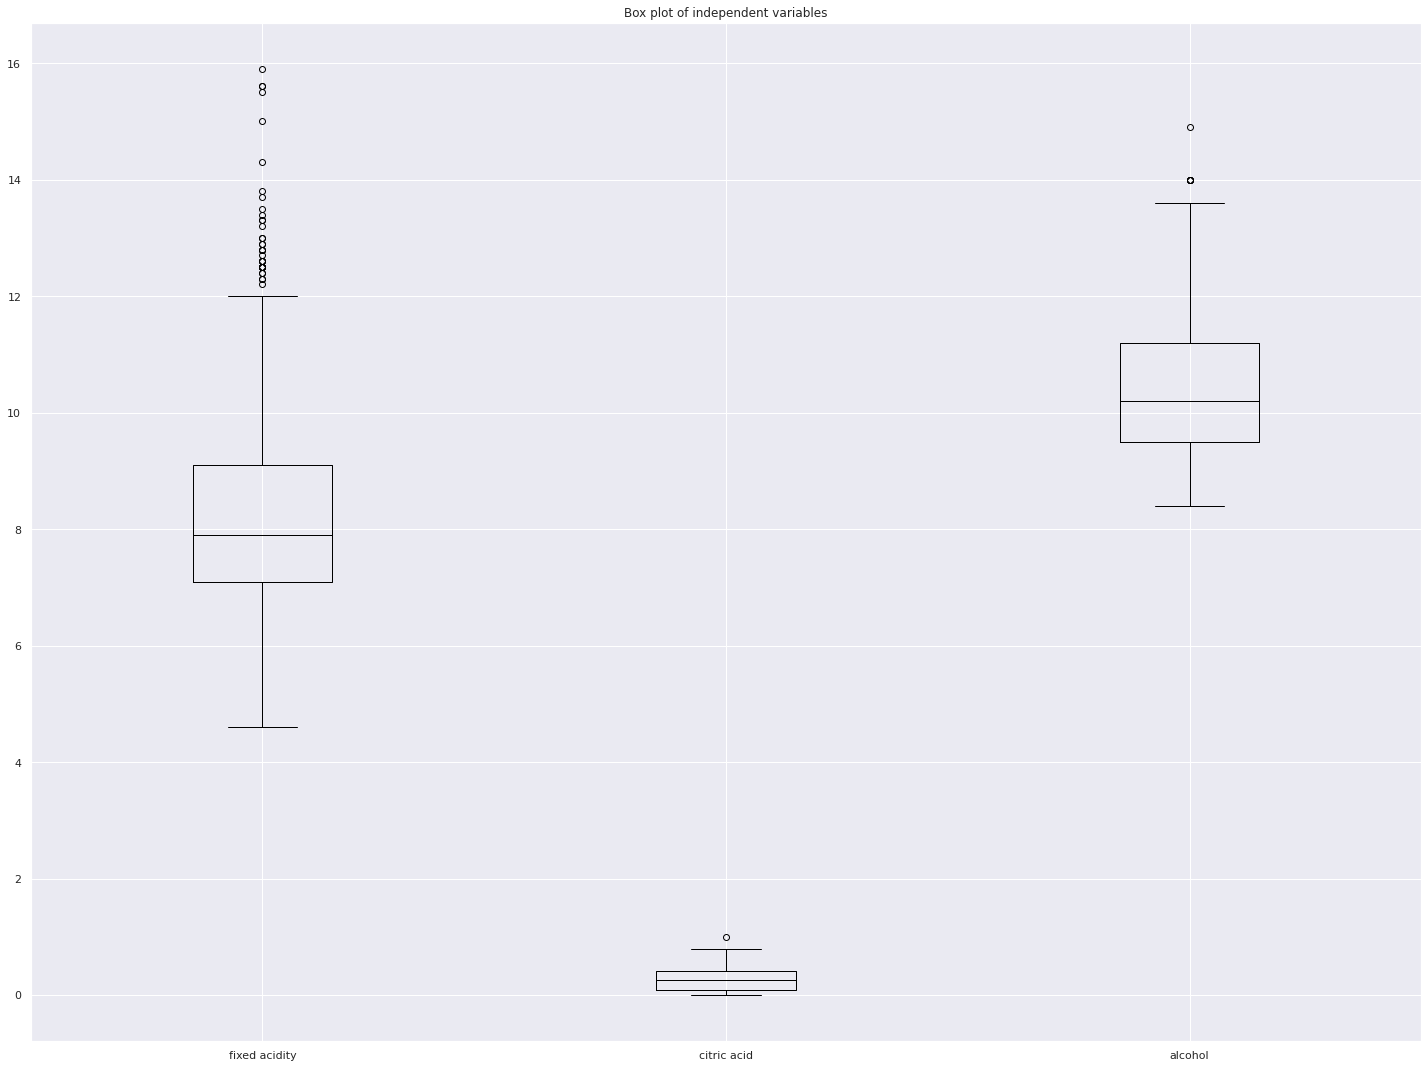

In [ ]:
# Plotting a box plot of each independent variable  X
X.plot(kind='box', figsize=(20,15), showfliers=True, title='Box plot of independent variables', color= 'black')
plt.tight_layout()

 A box plot of each independent variable in the X DataFrame. A box plot is a standardized way of displaying the distribution of data based on five number summary, which includes the minimum, first quartile, median, third quartile, and maximum.The figsize argument sets the size of the plot, and showfliers is set to True which means that the outlier points are displayed.For instance: In fixed acidity  the minimum is 4.5 the first quartile is 6.5, the median is 7 and the third quartile is 9.5  and the maximun is 12 and the scattered circles are the outliners.

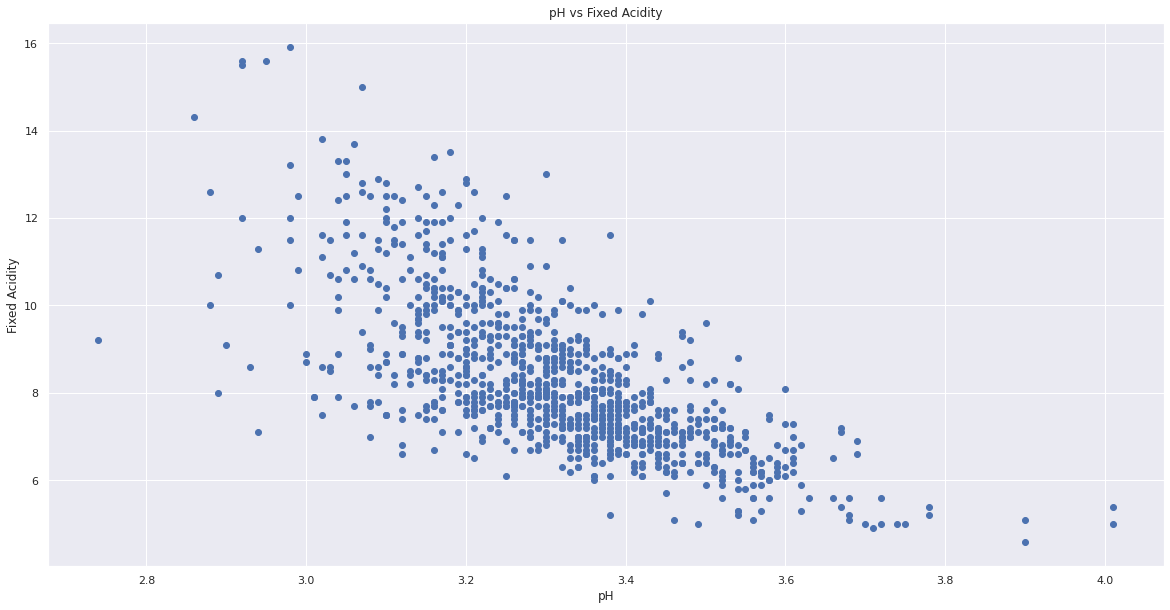

In [ ]:
#To generates a scatter plot to visualize the relationship between two variables, pH and fixed acidity.
plt.scatter(nimisha['pH'], nimisha['fixed acidity'])
#The x-axis represents the pH values
plt.xlabel('pH')

#The y-axis represents the fixed acidity values
plt.ylabel('Fixed Acidity')

#Displaying the titles.
plt.title('pH vs Fixed Acidity')

#Displays the plot
plt.show()

A scatter plot of independent variable (Fixed acidity) against dependent variable (pH) is shown.

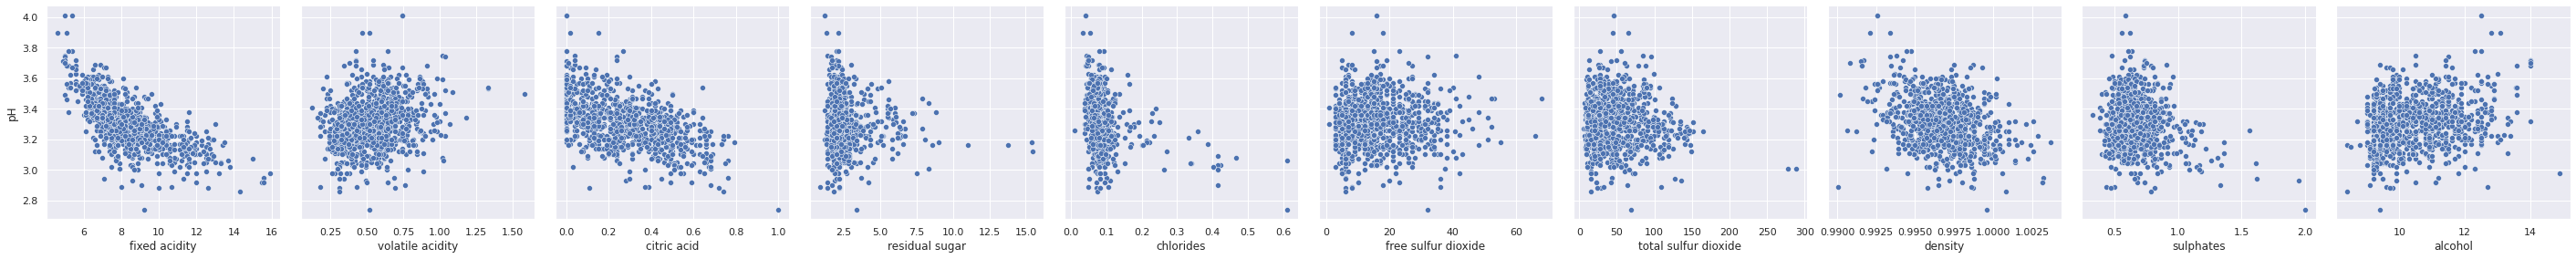

In [ ]:
#To visualize the relationships between the variables and the target variable, 'pH'.
#The x_vars parameter specifies the independent variables to plot on the x-axis, and the y_vars parameter specifies the target variable, pH, to plot on the y-axis.
sns.pairplot(nimisha, x_vars=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "sulphates", "alcohol"], y_vars='pH', height=4, aspect=1, kind='scatter')
plt.show()

It displays the scatterplots of dependent variable against independent variable.

<Figure size 1080x1080 with 0 Axes>

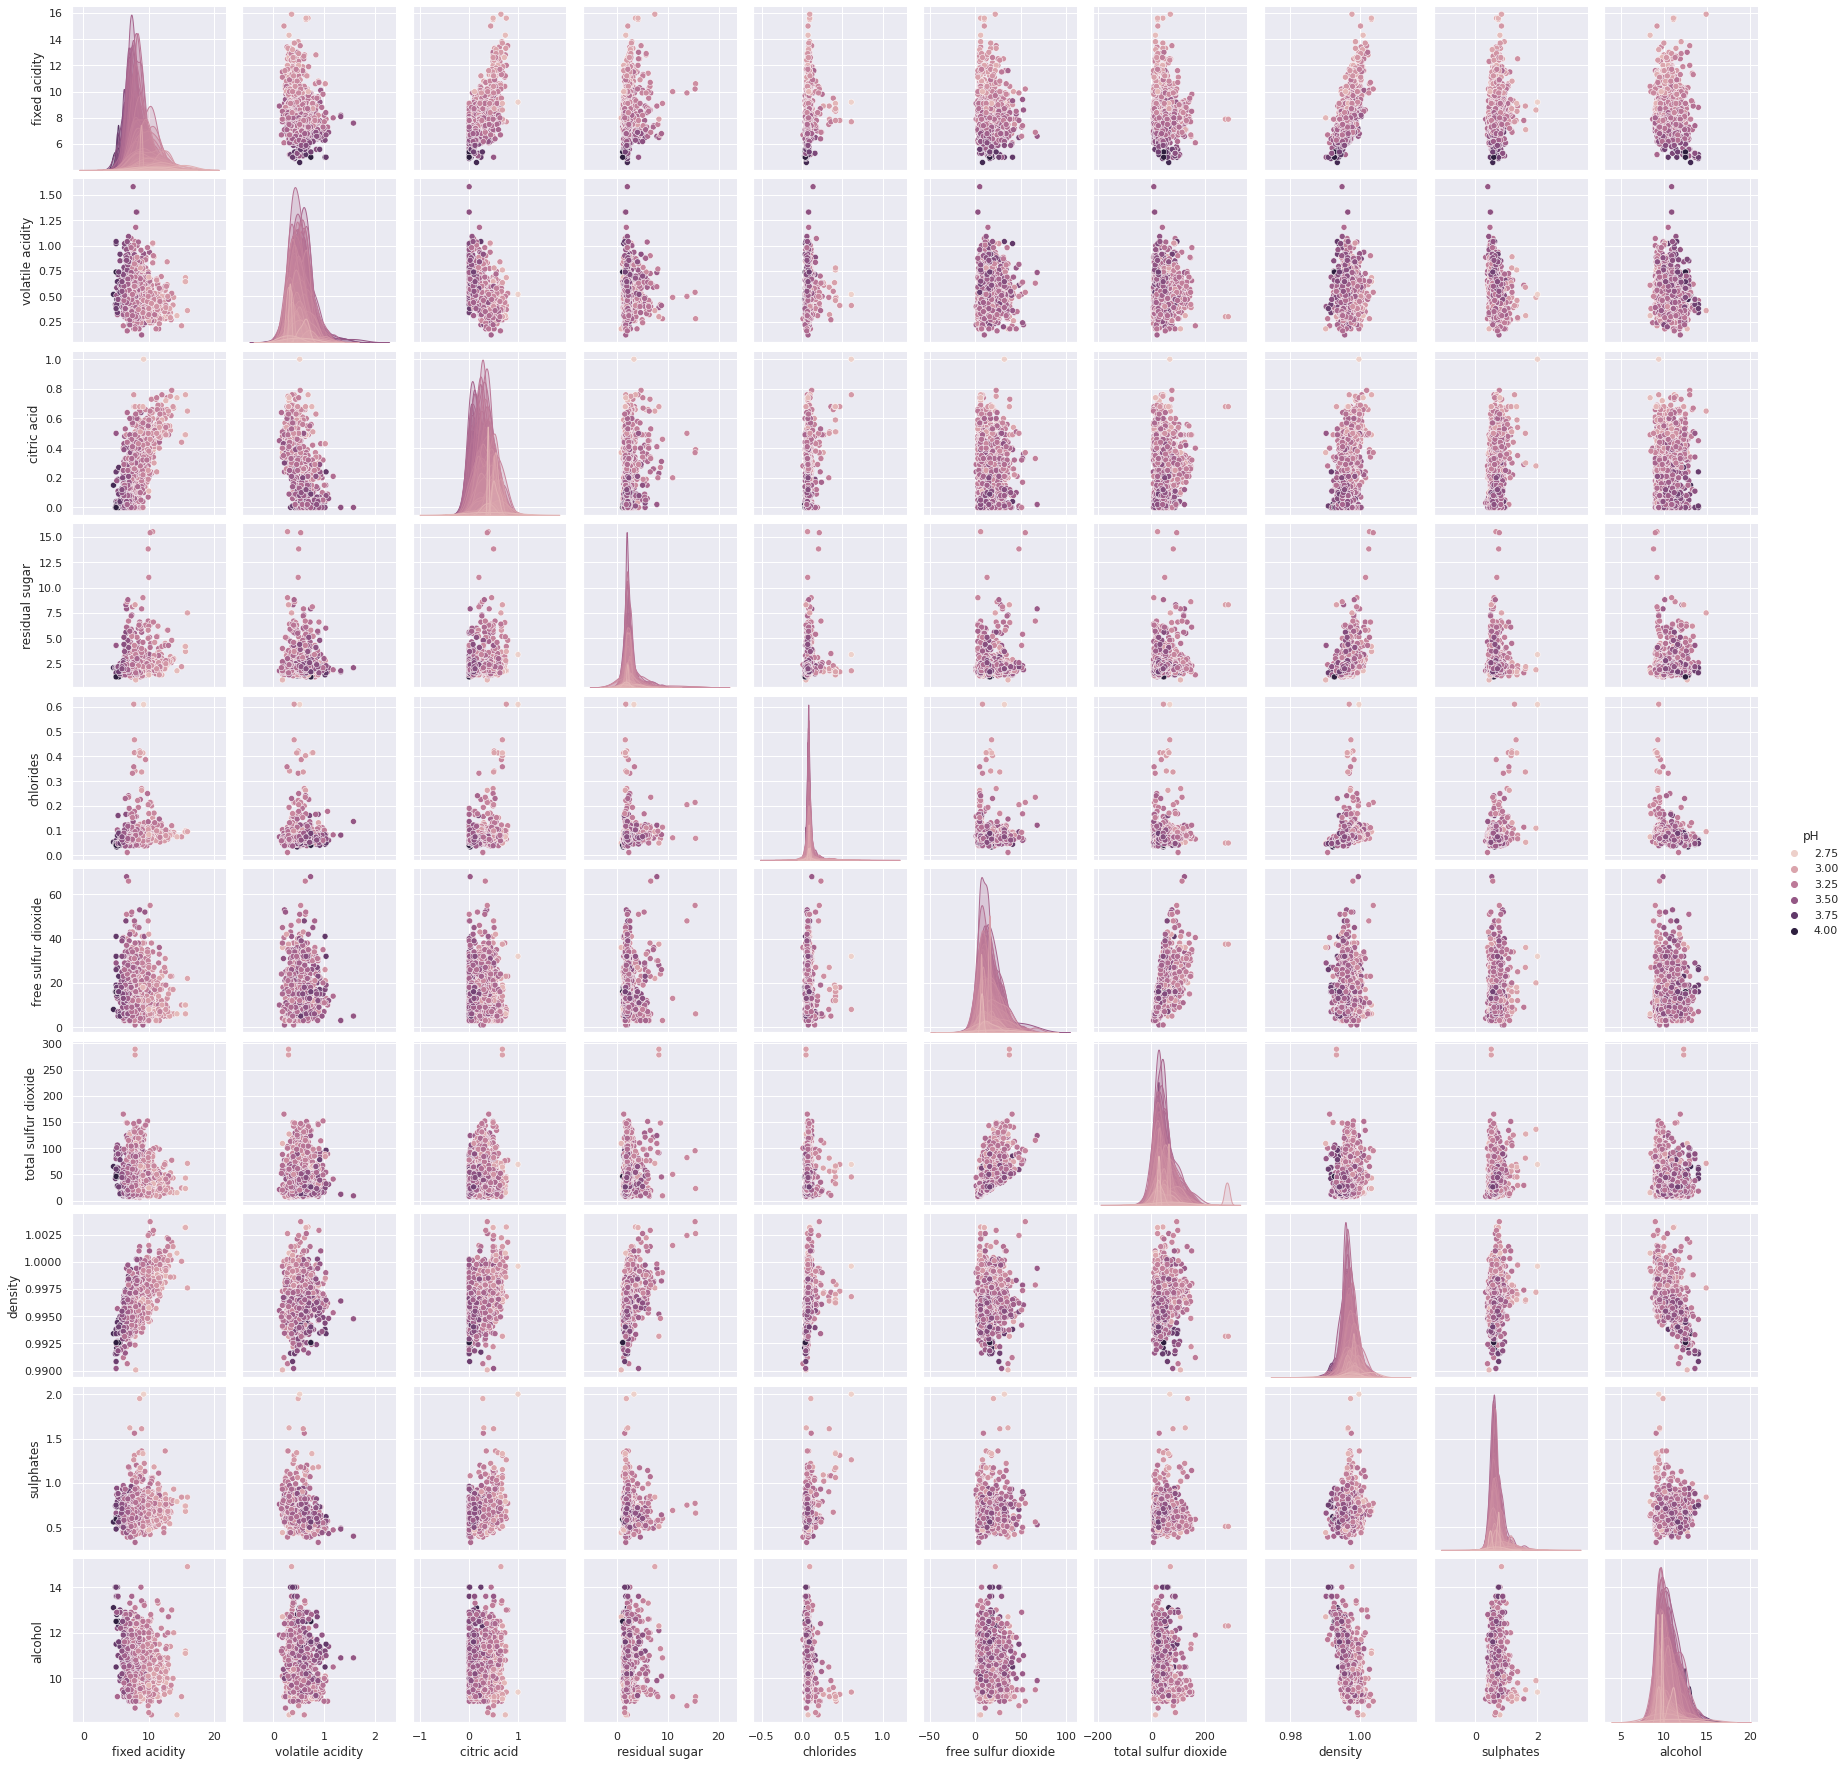

In [ ]:
#A pair plot to visualize the relationships between the variables

#To create a new figure and set its size to (15, 15).
plt.figure(figsize=(15, 15))

#The hue parameter to color the dots based on the values of the pH variable.
sns.pairplot(nimisha, hue="pH")

#To display the plot
plt.show()

<Figure size 360x144 with 0 Axes>

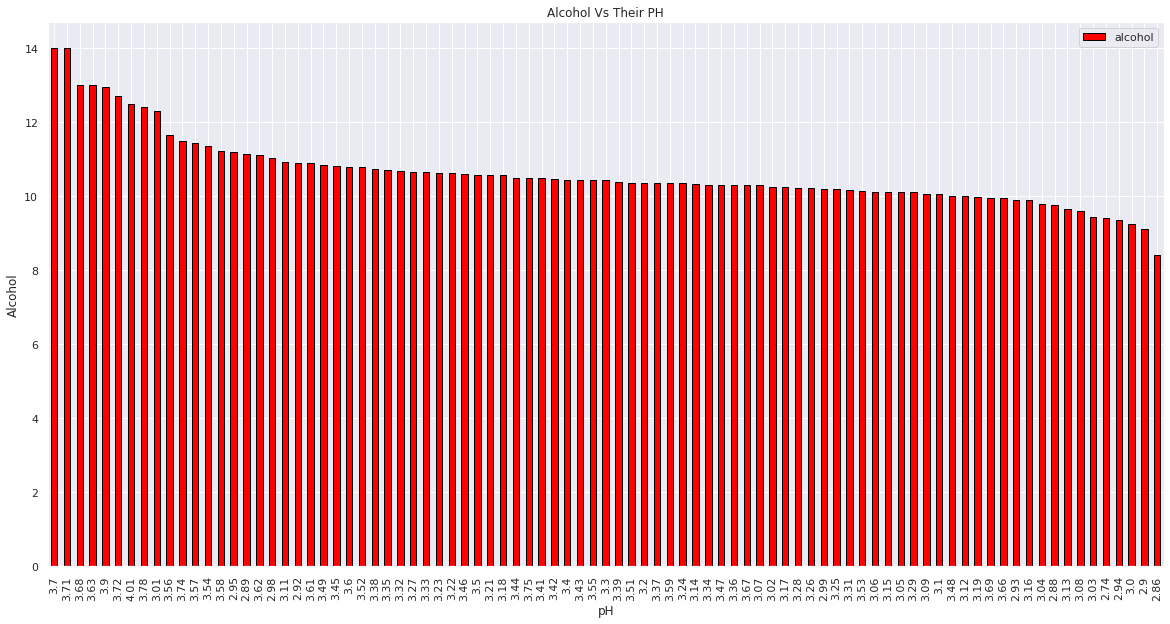

In [ ]:
# The bar plot of pH and their corresponding mean alcohol
plt.figure(figsize=(5, 2))
df_wine = pd.DataFrame(nimisha.groupby(['pH'])['alcohol'].mean().sort_values(ascending = False))
df_wine.plot.bar(color = 'Red', edgecolor = 'Black')
plt.xlabel("pH")
plt.ylabel("Alcohol")
plt.title('Alcohol Vs Their PH')
plt.show()

The largest pH value of the level alcohol is 3.7 and the smallest pH values is 2.86.

#To display a 3D scatter plot of the wine quality dataset:

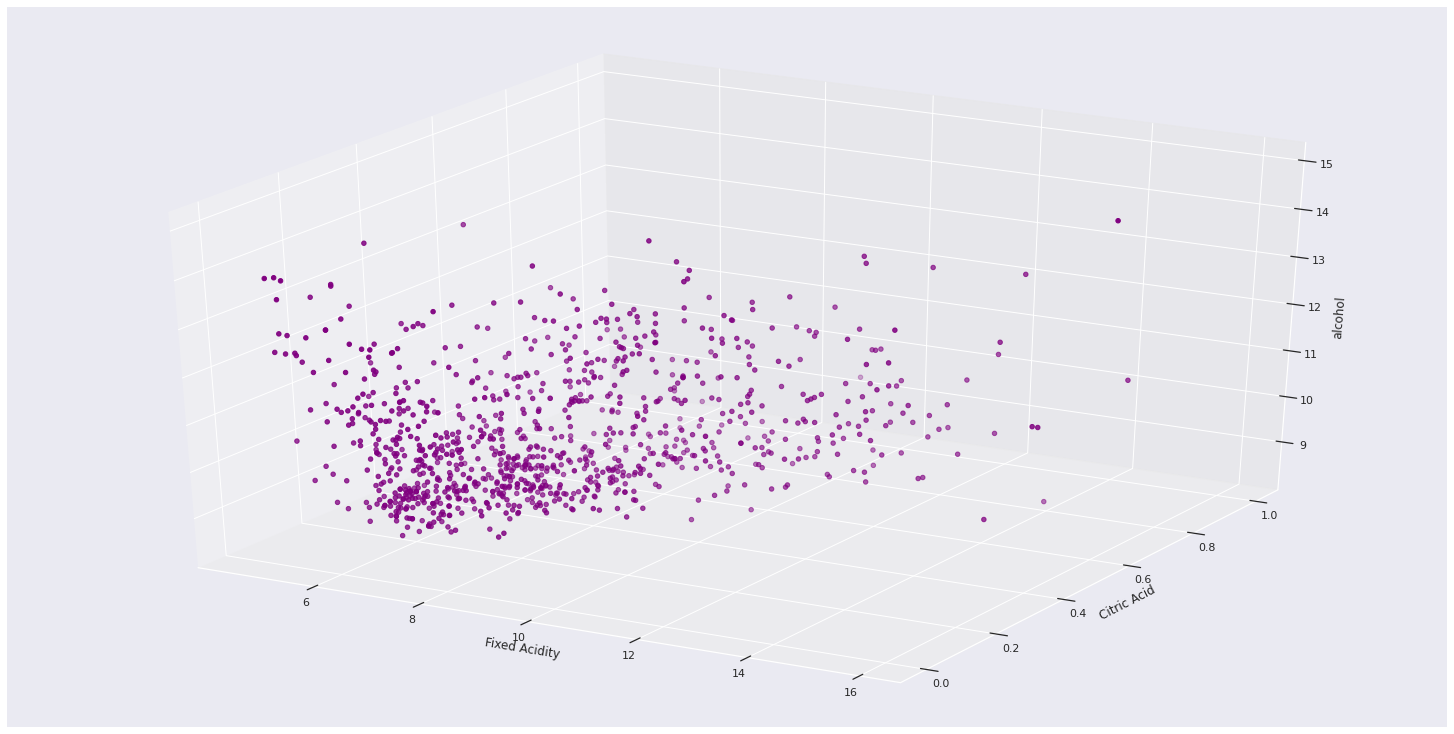

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Select three features to plot
N = nimisha[['fixed acidity', 'citric acid', 'alcohol']]

# Create a figure and 3D axis
fig = plt.figure()
ax = Axes3D(fig)

# Plot the 3D scatter plot
ax.scatter(N['fixed acidity'], N['citric acid'], N['alcohol'],c='purple' )

# Add labels for the x, y, and z axes
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Citric Acid')
ax.set_zlabel('alcohol')

# Show the plot
plt.show()

This code is plotting a 3D scatter plot using the 'fixed acidity', 'citric acid', and 'pH' columns from the "nimisha" dataframe. It uses the mpl_toolkits.mplot3d library to create a 3D axis and plot the scatter plot. The plot shows the relationship between the three selected features, with each point on the plot representing a different observation in the dataset. The X, Y, and Z axes are labeled as 'Fixed Acidity', 'Citric Acid', and 'pH' respectively.

## 3. Build Primary Model[Multiple Linear Regression] [5]
Once you have cleaned, transformed and Visualize your data build Multiple Linear Regression Model from Scratch.


# Step-1: Store the arrays in the Matrix Form:
Implement Following Equations:

\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
In Machine Learning parameters $\theta$ are also called weights, so from this step onwards we represent $\theta$ as $\textbf{W}$.

Here-Now:
\begin{align}
        \mathbf{Y} = W^T X + W_0
    \end{align}

\begin{align}
        \mathbf{W} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

In [ ]:
# Convert the DataFrame to a numpy array
np_array = nimisha.values

# Print the numpy array
print(np_array)

[[ 7.4    0.7    0.    ...  0.56   9.4    3.51 ]
 [ 7.8    0.88   0.    ...  0.68   9.8    3.2  ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    3.26 ]
 ...
 [ 6.2    0.6    0.08  ...  0.58  10.5    3.45 ]
 [ 5.9    0.55   0.1   ...  0.76  11.2    3.52 ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    3.57 ]]


In [ ]:
# Storing the arrays in the matrix form.
FixedAcidity = nimisha['fixed acidity'].to_numpy()
VolatileAcidity = nimisha['volatile acidity'].to_numpy()
CitricAcid = nimisha['citric acid'].to_numpy()
ResidualSugar = nimisha['residual sugar'].to_numpy()
Chlorides = nimisha['chlorides'].to_numpy()
FreeSulfurDioxide = nimisha['free sulfur dioxide'].to_numpy()
TotalSulfurDioxide = nimisha['total sulfur dioxide'].to_numpy()
Density = nimisha['density'].to_numpy()
Sulphates = nimisha['sulphates'].to_numpy()
Alcohol = nimisha['alcohol'].to_numpy()
pH = nimisha['pH'].to_numpy()


This code block converts the columns of the 'nimisha' DataFrame object into numpy arrays. Each column is named based on the column header of the dataframe and stored in a separate numpy array. For example, the 'fixed acidity' column is converted to the numpy array 'FixedAcidity'.

#Initialize the weights

In [ ]:
# Initializing a matrix to hold the independent variables
x0 = np.ones(len(FixedAcidity))
X2 = np.array([x0, FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Density, Sulphates, Alcohol]).T
# Initializing the weight matrix
W = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
# Storing the dependent variable in a numpy array
Y2 = np.array(pH)

 The first column of X2 is a column of ones, which is used to represent the bias term in linear regression. The rest of the columns correspond to the first, second, third, and fourth columns of X_matrix. X2 holds the independent variables.  The weight matrix W is initialized to an array of zeros. Finally, the dependent variable is stored in a numpy array Y2.

#Define the cost function.

# Step-2: Implement a Error/Cost Function.

We will use the Cost function: Mean Square Error i.e.
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
    \end{align}

Further Simplifications:

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i) - y_i)^2
    \end{align}
Here:
\begin{align}
  h_\theta = \theta_1*x
    \end{align}

Note:
In Machine Learning, m: denotes the length of the array (total No of rows in our case).

In [ ]:
#defining hypothesis function
def hypothesis(X, weights):
    return np.dot(X, weights)

In [ ]:
#Define the cost function
def costFun(X, Y, W):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
    m = len(Y) # len of data in your datasets
    h_x =np.dot(X,W)

    # error = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    error = sum((h_x - Y) ** 2)/(2 * m)
    return error

In [ ]:
#Evaluatng the value of a cost function
cost= costFun(X2, Y2, W)
#Displaying the value of cost function
print(cost)

5.495460166994101


The cost function measures the difference between the predicted values and the actual values, given the inputs and the parameters W. The purpose of this cost function is to evaluate the performance of a machine learning model and to guide the optimization process towards finding the best parameters that minimize the cost.

## Step-3: Optimization Algorithm

Our goal in this task is to minimize our error function with each input of examples(input data).
One of the most suitable methods to do the same is
\begin{align}
$\color{black}{\textbf{GRADIENT DESCENT ALGOROTHIM.}}$
\end{align}

Implement GDA from Scratch.

Function to estimate:
  *   $h_\theta(x) = \theta^T x$

Loss function to minimize:
  *   $(h_\theta(x) - y)^2$

Gradient: Decsent update:
  *   $\theta_(j+1)   = \theta_j - LR(D_\theta)$
  *   $D(\theta) = 1/m * (\theta^T * X)$ i.e. Derivative of parameters/weights.

In [ ]:
#Defining gradient descent

def gradient_descent(X, Y, A, beta, iterations):
    history_cost = [0] * iterations
    n = len(Y)

    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = X.dot(A)
        # Difference b/w Hypothesis and Actual Y
        loss = Y_pred - Y
        # Gradient Calculation
        dw = (X.T.dot(loss) ) / (n)
        # Changing Values of B using Gradient
        W_update = W - beta * dw
        # New Cost Value
        cost = costFun(X, Y, W_update)
        history_cost[iteration] = cost

    return W_update, history_cost

The code implements the gradient descent algorithm in Python to optimize the coefficients A of a linear regression model. The input parameters include the features X, target variable Y, initial coefficients A, learning rate beta, and number of iterations. The function returns the optimized coefficients W_update and a history of cost values over all iterations. The algorithm updates the coefficients by computing the hypothesis values, loss, gradient of the cost function, and new cost value in each iteration. The process repeats until convergence, returning the optimized coefficients and history of cost values.

#Training the Model

In [ ]:
# The code runs till 100000 Iterations
beta = 0.0001 # The total Learning Rate.
updated_weights, history_cost = gradient_descent(X2, Y2, W, beta, 100000)

# New Values of weight
print(updated_weights)

# Final Cost of our Iterations.
print(history_cost[-1])

[3.31150295e-04 2.72573193e-03 1.77335830e-04 8.73021611e-05
 8.33451768e-04 2.86596925e-05 5.19029519e-03 1.53036611e-02
 3.30046285e-04 2.16995619e-04 3.46531501e-03]
3.189520861223037


Here, the gradient descent algorithm runs for 100,000 iterations with a learning rate (beta) of 0.0001. It calls the gradient descent function with the inputs X2, Y2, the initial weights W, the learning rate beta, and the number of iterations. The function returns the updated weights and a history of cost values over all iterations. The final updated weights are printed, and the final cost of the iterations is also printed, which is the last value in the history_cost array. This value represents the final cost after the algorithm has converged, providing an insight into how well the model is fitting the data.

In [ ]:
#To evaluate the performance of a regression model
#Model Evaluation - rmse

#Defining rmse (root mean squared error) function calculates the root mean squared error between the actual target variables Y and the predicted target variables Y_pred.
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rmse: Root Mean Square.
  """

  #Calculating the Root Mean Squared Error (RMSE) by taking the square root of the average of the squared differences between the actual dependent variable values (Y) and the predicted dependent variable values (Y_pred).
  rmse = np.sqrt(sum((Y-Y_pred)**2)/len(Y))
  return rmse


# Model Evaluation - R2
# Defining r2 (R-squared error) function to calculate the coefficient of determinatio which is a measure of how well the model fits the data.

def r2(Y, Y_pred):
  """
   This Function calculates the R Squared Error.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rsquared: R Squared Error.
    """

  #Findng the mean.
  mean_y = np.mean(Y)

  #The variable "ss_tot" is the total sum of squares of the difference between Y and the mean of Y.

  ss_tot = sum((Y - mean_y) ** 2)

  #The variable "ss_res" is the residual sum of squares, which is the sum of squares of the difference between Y and the predicted target variable Y_pred.

  ss_res = sum((Y - Y_pred) ** 2)

  #R-squared error of a linear regression model
  r2 = 1 - (ss_res / ss_tot)

  #Returing the function.
  return r2

In [ ]:
#To evaluate the performance of the model that was trained using the gradient descent algorithm
Y_pred = X2.dot(updated_weights)
#The rmse and r2 functions are then called with Y2 and Y_pred as inputs.
print(rmse(Y2, Y_pred))
print(r2(Y2, Y_pred))

2.5256764880811775
-255.51023247812748


The appropriate evaluation metric for a multiple linear regression model depends on the specific problem and the goals of the analysis. In this case, since we are trying to predict the pH value of a wine, a common evaluation metric for regression problems is the Mean Squared Error (MSE). MSE measures the average squared difference between the predicted values and the true values. Lower values of MSE indicate that the model is making more accurate predictions.

## From Sklearn
### Train-Test Split


In [ ]:
#Importing the train_test_split function from the scikit-learn library's model_selection module. This function is used to split the input data into training and testing sets.
from sklearn.model_selection import train_test_split

#The input parameters for the function are X (the features), y (the target variable), train_size (the proportion of the data to be used for training), test_size (the proportion of the data to be used for testing), and random_state (the random seed for generating a random number).
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

Here, the data is being split into a training set (70%) and a testing set (30%) using the random_state value of 100. The outputs of the function are X_train (training features), X_test (testing features), y_train (training target), and y_test (testing target).

In [ ]:
#Printing the number of samples in the test and training datasets.
print('How many samples do we have in our test and train datasets?')
#Using np.shape function to determine the number of rows in each of the four arrays, X_train, y_train, X_test, and y_test
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (712, 10)
y_train:  (712,)
X_test:  (306, 10)
y_test:  (306,)


In [ ]:
#Creating a regression model using the statsmodels library.

X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
test = sm.OLS(y_train, X_train_sm).fit()



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Printing the summary of the model
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     183.8
Date:                Sun, 12 Feb 2023   Prob (F-statistic):          2.18e-188
Time:                        13:06:30   Log-Likelihood:                 739.87
No. Observations:                 712   AIC:                            -1458.
Df Residuals:                     701   BIC:                            -1407.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -63.4176 

In [ ]:
#Creating an instance of the LinearRegression class from the sklearn.linear_model module to make predictions on new, unseen data.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Data's parameters:
print('Data intercept: ', reg.intercept_)
print('Data coefficients: ', reg.coef_)

Data intercept:  -63.41763619535641
Data coefficients:  [-1.01821697e-01  3.20839811e-02 -1.81239804e-02 -3.02887528e-02
 -4.93206616e-01  1.21760693e-03 -5.24159681e-04  6.71126528e+01
 -9.21236927e-02  8.19043927e-02]


The "intercept_" attribute is the value of the y-intercept in the regression line, and the "coef_" attribute is an array of coefficients for the features in the regression equation. These values represent the parameters of the regression line that best fit the training data. By examining these values, we can gain insight into the relationship between the features and the target variable in the data.

In [ ]:
# Verifying the train dataset of independent variables
X_train.tail(7)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1063            5.6              0.54         0.04             1.7      0.049   
86              7.8              0.50         0.17             1.6      0.082   
963             6.1              0.34         0.25             1.8      0.084   
983             8.0              0.81         0.25             3.4      0.076   
934             9.1              0.76         0.68             1.7      0.414   
887             7.5              0.59         0.22             1.8      0.082   
580             8.4              0.25         0.39             2.0      0.041   

      free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  
1063                  5.0                  13.0  0.99420       0.58     11.4  
86                   21.0                 102.0  0.99600       0.48      9.5  
963                   4.0                  28.0  0.99464       0.44     10.1  
983                  34.0                  85.0  0.99668       0.42      9.2  
934                  18.0                  64.0  0.99652       1.33      9.1  
887                  43.0                  60.0  0.99499       0.42      9.2  
580                   4.0                  10.0  0.99386       0.71     12.5

Shows last 7 data of the dataset.

In [ ]:
#Verying datset of dependent variable
y_train.tail(8)

1022    3.18
1063    3.72
86      3.39
963     3.36
983     3.19
934     2.90
887     3.10
580     3.27
Name: pH, dtype: float64

Shows last 8 data of the dataset.

In [ ]:
#Storing resulting predictions of new data in the variable y_head
y_head = reg.predict(X_train)

In [ ]:
# importing "mean_squared_error" and "r2_score" functions from the "sklearn.metrics" library.
from sklearn.metrics import mean_squared_error, r2_score

#Printing mean squared error and the R-squared score  to evaluate the performance of the regression model.
print(mean_squared_error(y_train, y_head))
print(r2_score(y_train, y_head))

0.0073271162638814955
0.7239109283362237


The "mean_squared_error" function computes the mean squared error between the true and predicted values of the target variable, which is y_train and y_head. The "r2_score" function calculates the R-squared score between the true and predicted values of the target variable, which is y_train and y_head.

In [ ]:
#Printing mean square error
mse  = mean_squared_error(y_train, y_head)
mse

0.0073271162638814955

In [ ]:
#Printing R-squared score
r2 = r2_score(y_train, y_head)
r2

0.7239109283362237

## 4. Model Evaluation [1]
Pick an appropriate evaluation metric to evaluate your model on the test set.


Text(0, 0.5, 'predicted values')

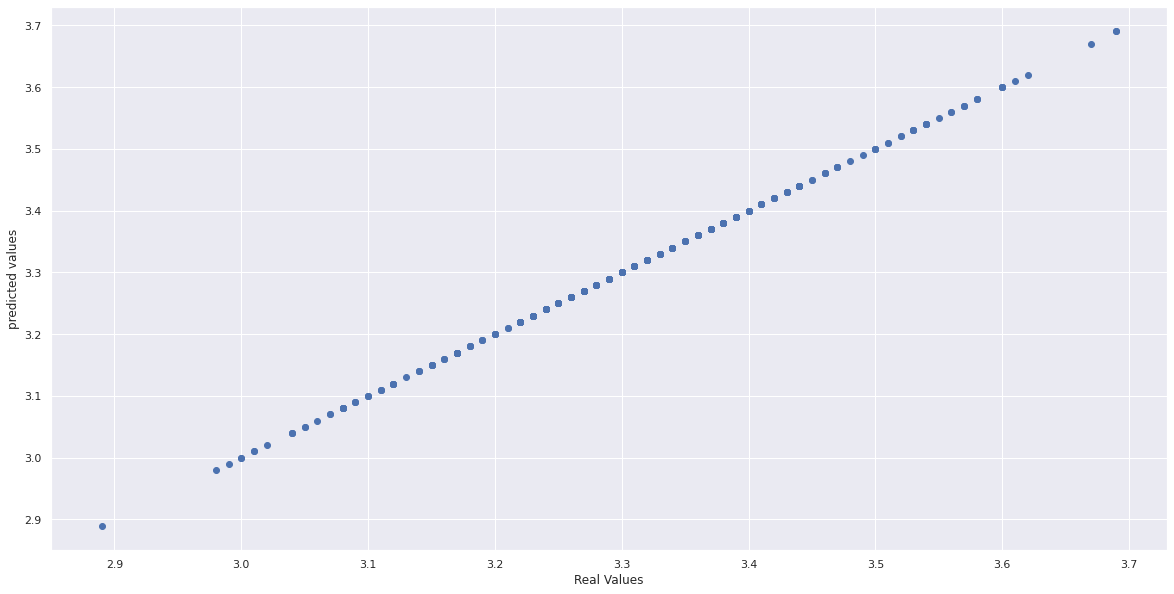

In [ ]:
#Creating a scatter plot that compares the real values (y_test) with the predicted values.
plt.scatter(y_test,y_test)
#The x-axis is labeled as "Real Values"
plt.xlabel("Real Values")
#The y-axis is labeled as "predicted values".
plt.ylabel("predicted values")

## 5. Dimensionality Reduction [6]
Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced fea tures,evaluate the model and Compare the output with the evaluation from step 4.


Principal Component Analysis (PCA) is a dimensionality reduction technique that can be used to reduce the number of features in a dataset while retaining as much information as possible. To apply PCA and rebuild the multiple linear regression model with reduced features:

In [ ]:
#Importing PCA from the "sklearn.metrics" library.

from sklearn.decomposition import PCA

#Performing a principal component analysis (PCA) on the input data and then comparing the performance of a linear regression model fit on both the original data and the PCA transformed data.
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
regressor_pca = LinearRegression()
regressor_pca.fit(X_train_pca, y_train)
y_pred_pca = regressor_pca.predict(X_test_pca)

# Evaluate the model using the mean squared error metric
mse_pca = mean_squared_error(y_test, y_pred_pca)
print("Mean Squared Error for PCA:", mse_pca)

# Compare the evaluation from step 4
if mse < mse_pca:
    print("The model without PCA works better.")
else:
    print("The model with PCA works better.")

Mean Squared Error for PCA: 0.011521796372024275
The model without PCA works better.


Here,The PCA transformation is applied to the training data and the test data to reduce their dimensionality to 3 components. The linear regression model is then fit on both the PCA transformed training data and the original training data.The performance of the models is evaluated by calculating the mean squared error (MSE) between the true target values and the predicted target values for the test data. The MSE of the model fit on the original data and the MSE of the model fit on the PCA transformed data are compared, and it is determined which model performed better based on which had a lower MSE.

In [ ]:
#Evaluating on the test data
r2_pca = r2_score(y_test, y_pred_pca)
print("R2 for PCA:", mse_pca)

#comparing the performance of two linear regression models from step 4
if r2 < r2_pca:
    print("The model without PCA works better.")
else:
    print("The model with PCA works better.")

R2 for PCA: 0.011521796372024275
The model with PCA works better.


If the MSE for the first model is smaller than the MSE for the second model, the code prints "The model without PCA works better." If the R-squared score for the first model is greater than the R-squared score for the second model, the code prints "The model without PCA works better."

In [ ]:
#Returns the shape (dimensions) of the array X and printing the result as  tuple with two values, representing the number of rows and columns in X, respectively.
X.shape

(1018, 3)

This information is useful for determining the size and structure of the data stored in X.

In [ ]:
#Returning '.shape' attribute as a tuple with the number of rows as the first value and the number of columns as the second value.
X_train.shape

(712, 10)

This information is important for understanding the size and structure of the training data that the model is being built on.

In [ ]:
#Returning the shape of the training data after it has been transformed into principal components using the PCA method
X_train_pca.shape

(712, 3)

Here, the shape is represented as a tuple, where the first element is the number of samples and the second element is the number of components specified in the PCA method.

In [ ]:
#Retrieving the shape of numpy array
X_test_pca.shape

(306, 3)

Here, the output of this code will give the number of samples (rows) and the number of features (columns) in the X_test_pca array after applying the PCA transformation.

In [ ]:
#Printing the string "DataFrame" to the console
print("DataFrame:")
nimisha = pd.DataFrame(nimisha)
#Display the contents of the DataFrame in a nicely formatted table.
display(nimisha)

DataFrame:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               6.7             0.580         0.08            1.80      0.097   
10              5.6             0.615         0.00            1.60      0.089   
11              7.8             0.610         0.29            1.60      0.114   
12              8.5             0.280         0.56            1.80      0.092   
13              7.9             0.320         0.51            1.80      0.341   
14              7.6             0.390         0.31            2.30      0.082   
15              7.9             0.430         0.21            1.60      0.106   
16              8.5             0.490         0.11            2.30      0.084   
17              6.9             0.400         0.14            2.40      0.085   
18              6.3             0.390         0.16            1.40      0.080   
19              7.6             0.410         0.24            1.80      0.080   
20              7.1             0.710         0.00            1.90      0.080   
21              7.8             0.645         0.00            2.00      0.082   
22              6.7             0.675         0.07            2.40      0.089   
23              8.3             0.655         0.12            2.30      0.083   
24              5.2             0.320         0.25            1.80      0.103   
25              7.8             0.645         0.00            5.50      0.086   
26              7.8             0.600         0.14            2.40      0.086   
27              8.1             0.380         0.28            2.10      0.066   
28              7.3             0.450         0.36            5.90      0.074   
29              8.8             0.610         0.30            2.80      0.088   
30              7.5             0.490         0.20            2.60      0.332   
31              8.1             0.660         0.22            2.20      0.069   
32              4.6             0.520         0.15            2.10      0.054   
33              7.7             0.935         0.43            2.20      0.114   
34              8.8             0.660         0.26            1.70      0.074   
35              6.6             0.520         0.04            2.20      0.069   
36              6.6             0.500         0.04            2.10      0.068   
37              8.6             0.380         0.36            3.00      0.081   
38              7.6             0.510         0.15            2.80      0.110   
39             10.2             0.420         0.57            3.40      0.070   
40              7.8             0.590         0.18            2.30      0.076   
41              7.3             0.390         0.31            2.40      0.074   
42              8.8             0.400         0.40            2.20      0.079   
43              7.7             0.690         0.49            1.80      0.115   
44              7.0             0.735         0.05            2.00      0.081   
45              7.2             0.725         0.05            4.65      0.086   
47              6.6             0.705         0.07            1.60      0.076   
48              8.0             0.705         0.05            1.90      0.074   
49              7.7             0.690         0.22            1.90      0.084   
50              8.3             0.675

## 6. Conclusion [1]
Conclude the result of the comparison.

In [ ]:
r2_pca = r2_score(y_test, y_pred_pca)
print("R2 for PCA:", mse_pca)

#Comparing the performance of two linear regression models from step 4
if r2 < r2_pca:
    print("The model without PCA works better.")
else:
    print("The model with PCA works better.")

R2 for PCA: 0.011521796372024275
The model with PCA works better.


Based on the results of the linear regression models with and without PCA, it seems that the model with PCA performs better. The R2 value for the model with PCA is 0.011521796372024275, which is higher than the R2 value for the model without PCA. This indicates that the model with PCA is able to better explain the variance in the target variable. It is important to note that the R2 value alone does not provide a complete picture of the performance of the model, but it is a commonly used metric for evaluating the performance of regression models. Overall, the use of PCA in this case has improved the performance of the linear regression model.